In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn import preprocessing

In [4]:
data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
data


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
data.shape

(23486, 11)

In [6]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Title','Division Name', 'Department Name', 'Class Name', 'Review Text'])


In [9]:
col_encode = ['Title','Review Text','Division Name']
for column in col_encode:
  data[column]=data[column].astype('category').cat.codes
data_cleaned = data.dropna()
print(data_cleaned)

       Unnamed: 0  Clothing ID  Age  Title  Review Text  Rating  \
0               0          767   33     -1          245       4   
1               1         1080   34     -1        13177       5   
2               2         1077   60  11448         4925       3   
3               3         1049   50   8052         7405       5   
4               4          847   47   4362        20322       5   
...           ...          ...  ...    ...          ...     ...   
23481       23481         1104   34   5301        11037       5   
23482       23482          862   48  13792        12145       3   
23483       23483         1104   31   3264        18497       3   
23484       23484         1084   28  13173         3631       3   
23485       23485         1104   52   9706        17684       5   

       Recommended IND  Positive Feedback Count  Division Name  \
0                    1                        0              2   
1                    1                        4              0 

In [10]:
data.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name               0
Department Name            14
Class Name                 14
dtype: int64

In [11]:
age_column =data['Age']
CI_intervals= [15,20,25,30,35,40,45,np.inf]
binned_data = np.digitize(age_column,CI_intervals,right =False)
print("Data:",age_column)
print("Binneddata:",binned_data)

Data: 0        33
1        34
2        60
3        50
4        47
         ..
23481    34
23482    48
23483    31
23484    28
23485    52
Name: Age, Length: 23486, dtype: int64
Binneddata: [4 4 7 ... 4 3 7]


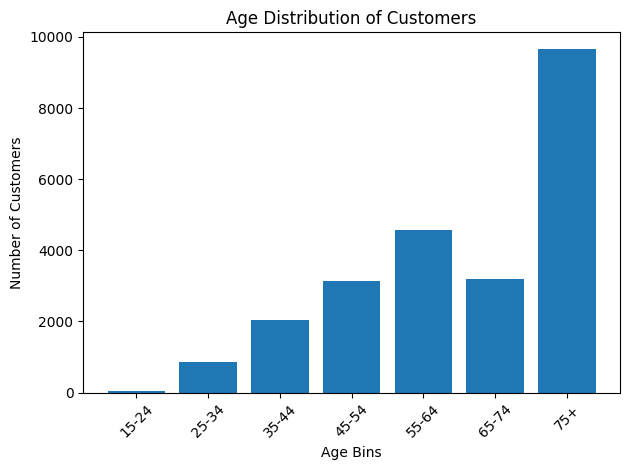

In [12]:
bin_counts = np.bincount(binned_data)
bin_labels = ["15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
plt.bar(bin_labels, bin_counts[1:], align='center')
plt.xlabel("Age Bins")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,5802.888742,10909.525036,4.196032,0.822362,2.535936,0.473048
std,6779.968547,203.298980,12.279544,4428.810884,6752.220626,1.110031,0.382216,5.702202,0.615132
min,0.000000,0.000000,18.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000
25%,5871.250000,861.000000,34.000000,1426.250000,5025.250000,4.000000,1.000000,0.000000,0.000000
50%,11742.500000,936.000000,41.000000,5709.500000,10895.500000,5.000000,1.000000,1.000000,0.000000
75%,17613.750000,1078.000000,52.000000,9585.000000,16761.750000,5.000000,1.000000,3.000000,1.000000
max,23485.000000,1205.000000,99.000000,13992.000000,22633.000000,5.000000,1.000000,122.000000,2.000000


In [14]:
from numpy import cov
x=data['Age']
y=data['Rating']
covar=cov(x,y)[0,1]
print(covar)

0.3657187261402116


In [15]:
x=data['Age']
y=data['Rating']
cov_mat = np.stack((x, y), axis = 0)
print(np.cov(cov_mat))

[[150.78719141   0.36571873]
 [  0.36571873   1.2321682 ]]


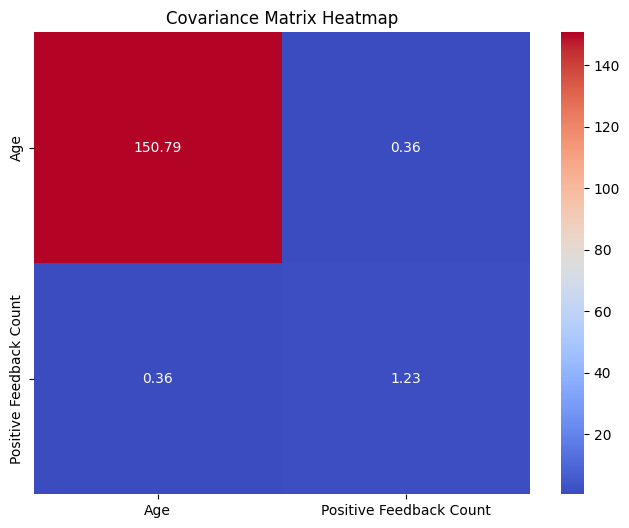

In [16]:
x = data['Age']
y = data['Rating']
cov_matrix = np.array([[150.79, 0.365], [0.365, 1.232]])

plt.figure(figsize=(8, 6))
sn.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=['Age', 'Positive Feedback Count'],
            yticklabels=['Age', 'Positive Feedback Count'])
plt.title("Covariance Matrix Heatmap")
plt.show()


In [17]:
#association between departmentname and class name
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Department Name'], data['Class Name'])
contingency_table

Class Name,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Department Name,,,,,,,,,,,,,,,,,,,,
Bottoms,0,2,0,0,0,0,0,1147,0,0,0,0,0,1388,317,945,0,0,0,0
Dresses,0,0,0,6319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Intimate,0,0,1,0,0,154,0,0,0,146,165,691,0,0,0,0,228,0,350,0
Jackets,0,0,0,0,0,0,704,0,0,0,0,0,328,0,0,0,0,0,0,0
Tops,3097,0,0,0,1100,0,0,0,4843,0,0,0,0,0,0,0,0,1428,0,0
Trend,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119


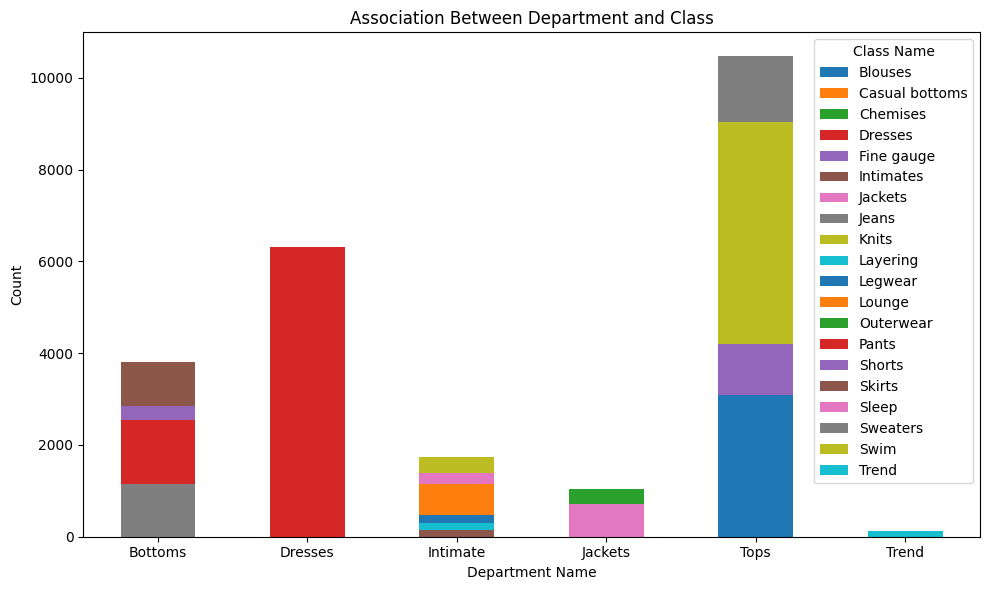

In [18]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
# stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Association Between Department and Class")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.legend(title="Class Name")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print('the association between department and class is independent thus we reject null hypothesis')
else:
    print('the association between department and class is independent thus we fail reject null hypothesis')

In [25]:
expected

array([[5.01256944e+02, 3.23704840e-01, 1.61852420e-01, 1.02274544e+03,
        1.78037662e+02, 2.49252727e+01, 1.13944104e+02, 1.85644726e+02,
        7.83851270e+02, 2.36304533e+01, 2.67056493e+01, 1.11840022e+02,
        5.30875937e+01, 2.24651159e+02, 5.13072171e+01, 1.52950537e+02,
        3.69023517e+01, 2.31125256e+02, 5.66483470e+01, 1.92604380e+01],
       [8.33756944e+02, 5.38428766e-01, 2.69214383e-01, 1.70116569e+03,
        2.96135821e+02, 4.14590150e+01, 1.89526926e+02, 3.08788897e+02,
        1.30380526e+03, 3.93052999e+01, 4.44203732e+01, 1.86027139e+02,
        8.83023177e+01, 3.73669564e+02, 8.53409594e+01, 2.54407592e+02,
        6.13808793e+01, 3.84438139e+02, 9.42250341e+01, 3.20365116e+01],
       [2.28923611e+02, 1.47835719e-01, 7.39178596e-02, 4.67086955e+02,
        8.13096455e+01, 1.13833504e+01, 5.20381731e+01, 8.47837849e+01,
        3.57984194e+02, 1.07920075e+01, 1.21964468e+01, 5.10772410e+01,
        2.42450579e+01, 1.02597989e+02, 2.34319615e+01, 6.9852

In [20]:
# independent t test between mean age
import scipy.stats as stats
age_column =data['Age']
bin_labels = ["15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
grp_1=data[(data['Age']>=35) & (data['Age']<=44)]['Rating']
grp_2=data[(data['Age']>=45) & (data['Age']<=54)]['Rating']

In [21]:
t_statistic ,p_value = stats.ttest_ind(grp_1, grp_2)
alpha = 0.05  # Significance level
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ratings between the age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between the age groups.")





t-statistic: 0.6092865704307239
p-value: 0.5423452546934677
Fail to reject the null hypothesis: There is no significant difference in ratings between the age groups.


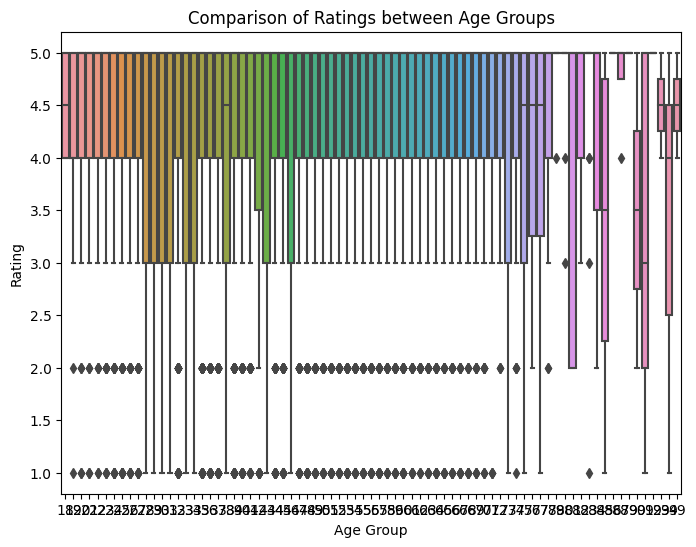

In [23]:
#boxplot visualization
plt.figure(figsize=(8, 6))
sn.boxplot(x=data['Age'], y=data['Rating'])
plt.title("Comparison of Ratings between Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Rating")
plt.show()